In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np




drive.mount('/content/drive')
w0 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/test.csv', header=0) # actual test
w1 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/test_mini.csv', header=0) #last week of training data
w2 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train_w2.csv', header=0) # last week -1  of training data
w3 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train_w3.csv', header=0) # last week -2
w_3_2 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train_mini2weeks.csv', header=0) # 2 weeks of training data weeks 3 and 2
weeks_4 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/weeks_4.csv', header=0)
train = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train.csv', header=0) # full data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=train.fillna(0)
train=train.round(10)

In [ ]:
#baseline linear regression, contains all training data

X =train[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y = train[["consumption"]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, shuffle=False)

In [ ]:

# creating an object of LinearRegression class
LR_base = LinearRegression()
# fitting the training data
LR_base.fit(x_train, y_train) #(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=LR_base.predict(x_test)

In [ ]:

mean_absolute_error(y_test,y_pred)

0.5303773363848984

################################################################################################################################################################

In [ ]:
#hours using numbers 1-24
X =train[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y = train[["consumption"]]
X['hours'] = train.time.str[11:13]  #hours 1-24
X['hours']=pd.to_numeric(X['hours'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, shuffle=False)
LR_hours = LinearRegression()
LR_hours.fit(x_train, y_train) 
y_pred=LR_hours.predict(x_test)
mean_absolute_error(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.5358175728490593

In [ ]:
# code from https://towardsdatascience.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b
#use sin and cosin to indicate cycle, hours 1-24 are dropped
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

In [ ]:


X =train[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y = train[["consumption"]]
X['hours'] = train.time.str[11:13]
X['hours']=pd.to_numeric(X['hours'])


X = generate_cyclical_features(X, 'hours', 24, 0) #actual test


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, shuffle=False)
LR_sin_cos = LinearRegression()
LR_sin_cos.fit(x_train, y_train) 
y_pred=LR_sin_cos.predict(x_test)
mean_absolute_error(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.5573936391441121

In [ ]:
X

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,sin_hours,cos_hours
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.000000,1.000000
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.258819,0.965926
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.500000,0.866025
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,0.707107,0.707107
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,27.1,17.0,54.0,0.0,0.0,180.0,4.0,11.1,1020.0,2.0,0.53494,-0.965926,0.258819
8588,25.1,17.1,61.0,0.0,0.0,220.0,6.0,11.1,1021.0,1.0,0.49990,-0.866025,0.500000
8589,24.9,18.1,66.0,0.0,0.0,150.0,4.0,9.3,1020.9,4.0,0.43149,-0.707107,0.707107
8590,22.1,17.0,73.0,0.0,0.0,160.0,6.0,9.3,1021.0,2.0,0.55203,-0.500000,0.866025


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


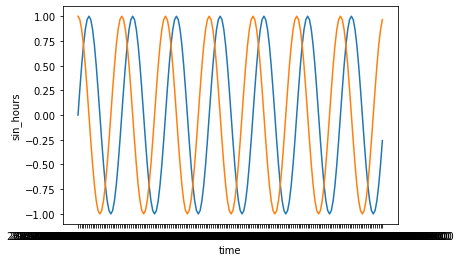

In [ ]:
import seaborn as sns# 
sns.lineplot(train.head(168)['time'], X['sin_hours'])
sns.lineplot(train.head(168)['time'], X['cos_hours'])

######################################################################
temp and hours only

In [ ]:
X =train[["temp"]]
y = train[["consumption"]]
X['hours'] = train.time.str[11:13]
X['hours']=pd.to_numeric(X['hours'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, shuffle=False)
LR_temp_hour = LinearRegression()
LR_temp_hour.fit(x_train, y_train) 
y_pred=LR_temp_hour.predict(x_test)
mean_absolute_error(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.43045551350660066

In [ ]:
dataframe=train.copy()

previous_hours=1  #### How can we use consumption if this is what we need to predict?
if previous_hours:
  for i in range(1, previous_hours+1):
    dataframe['{}cons'.format(i)] = dataframe.consumption.shift(i)

  # Cut out first n rows with NaNs
  dataframe = dataframe[previous_hours:]
  print(dataframe) 

X =dataframe[["temp"]]
y = train[["consumption"]]
X['hours'] = dataframe.time.str[11:13]
X['hours']=pd.to_numeric(X['hours'])
"""
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, shuffle=False)
LR_temp_hour_lag1 = LinearRegression()
LR_temp_hour_lag1.fit(x_train, y_train) 
y_pred=LR_temp_hour_lag1.predict(x_test)
mean_absolute_error(y_test,y_pred)"""

                           time  temp  dwpt  rhum  prcp  snow   wdir  wspd  \
1     2021-09-01 01:00:00+03:00  10.7   9.6  93.0   0.0   0.0  320.0   7.2   
2     2021-09-01 02:00:00+03:00   9.9   9.0  94.0   0.0   0.0  320.0   7.2   
3     2021-09-01 03:00:00+03:00  10.0   8.4  90.0   0.0   0.0  330.0   7.2   
4     2021-09-01 04:00:00+03:00   9.0   8.1  94.0   0.0   0.0  300.0   3.6   
5     2021-09-01 05:00:00+03:00   9.3   8.8  97.0   0.0   0.0  300.0   7.2   
...                         ...   ...   ...   ...   ...   ...    ...   ...   
8587  2022-08-24 19:00:00+03:00  27.1  17.0  54.0   0.0   0.0  180.0   4.0   
8588  2022-08-24 20:00:00+03:00  25.1  17.1  61.0   0.0   0.0  220.0   6.0   
8589  2022-08-24 21:00:00+03:00  24.9  18.1  66.0   0.0   0.0  150.0   4.0   
8590  2022-08-24 22:00:00+03:00  22.1  17.0  73.0   0.0   0.0  160.0   6.0   
8591  2022-08-24 23:00:00+03:00  22.1  18.1  78.0   0.0   0.0  310.0  15.0   

      wpgt    pres  coco  el_price  consumption  1cons  
1     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


'\nx_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state = 42, shuffle=False)\nLR_temp_hour_lag1 = LinearRegression()\nLR_temp_hour_lag1.fit(x_train, y_train) \ny_pred=LR_temp_hour_lag1.predict(x_test)\nmean_absolute_error(y_test,y_pred)'

In [ ]:
# try out pycaret library. Should compare different models at once  ## didn't get it to work

In [ ]:
!pip install --pre pycaret

In [ ]:
!pip install xgboost==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 9.3 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from pycaret.time_series import TSForecastingExperiment

In [ ]:
pycaret_data_test=  pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/test_mini.csv', header=0

)
pycaret_data_train=  pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train_w2.csv', header=0

)
""",
    parse_dates=["time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),"""

pycaret_data_train=pycaret_data_train.fillna(0)
pycaret_data_train=pycaret_data_train.round(10)

pycaret_data_test=pycaret_data_test.fillna(0)
pycaret_data_test=pycaret_data_test.round(10)

In [ ]:
#X =train[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
#y = train[["consumption"]]
pycaret_data_train['hours'] = pycaret_data_train.time.str[11:13]
pycaret_data_train['hours']=pd.to_numeric(pycaret_data_train['hours'])

pycaret_data_test['hours'] = pycaret_data_test.time.str[11:13]
pycaret_data_test['hours']=pd.to_numeric(pycaret_data_test['hours'])

def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

pycaret_data_train = generate_cyclical_features(pycaret_data_train, 'hours', 24, 0) #
pycaret_data_test= generate_cyclical_features(pycaret_data_test, 'hours', 24, 0)

In [ ]:
#pycaret_data['time']=pd.PeriodIndex(pycaret_data['time'], freq='H')

In [ ]:
forecast=168 #7days /168 tundi
fold=3
# Global Plot Settings
fig_kwargs={'renderer': 'notebook'}



In [ ]:
pycaret_data_train=pycaret_data_train[["time","y"]]
pycaret_data_test=pycaret_data_test[["time","y"]]

In [ ]:
pycaret_data_train= pycaret_data_train.set_index("time").to_period("H")
pycaret_data_test= pycaret_data_test.set_index("time").to_period("H")

TypeError: ignored

In [ ]:
pycaret_data_train=pycaret_data_train.squeeze()
pycaret_data_test=pycaret_data_test.squeeze()

In [ ]:
pycaret_data_train=pycaret_data_train[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price", "sin_hours", "cos_hours","y"]]

pycaret_data_test = pycaret_data_test[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price", "sin_hours", "cos_hours","y"]]


In [ ]:
pycaret_data_test

In [ ]:
eda = TSForecastingExperiment()
eda.setup(data=pycaret_data_train)

In [ ]:
eda.models()

In [ ]:
model = eda.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,24))

In [ ]:
# import the regression module
from pycaret.regression import *

In [ ]:
pycaret_data_train

In [ ]:
pycaret_data_test

 target = 'y',
 numeric "temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"

In [ ]:
s = setup(data = pycaret_data_train, test_data = pycaret_data_test, target='y', fold_strategy = 'timeseries', 
          numeric_features =["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price", "sin_hours", "cos_hours"], fold = 3, transform_target = True, session_id = 123)

In [ ]:
best = compare_models( errors="raise")

In [ ]:
best

In [ ]:
###########################################################

In [ ]:
### use only data that correlates with consumption

In [ ]:
#X =train[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
#y = train[["consumption"]]
X['hours'] = train.time.str[11:13]  #hours 1-24
X['hours']=pd.to_numeric(X['hours'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,hours
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,1
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,2
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,3
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8587,27.1,17.0,54.0,0.0,0.0,180.0,4.0,11.1,1020.0,2.0,0.53494,19
8588,25.1,17.1,61.0,0.0,0.0,220.0,6.0,11.1,1021.0,1.0,0.49990,20
8589,24.9,18.1,66.0,0.0,0.0,150.0,4.0,9.3,1020.9,4.0,0.43149,21
8590,22.1,17.0,73.0,0.0,0.0,160.0,6.0,9.3,1021.0,2.0,0.55203,22


In [ ]:
"""https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py
As F-test captures only linear dependency, 
mutual information can capture any kind of dependency between variables 
"""

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


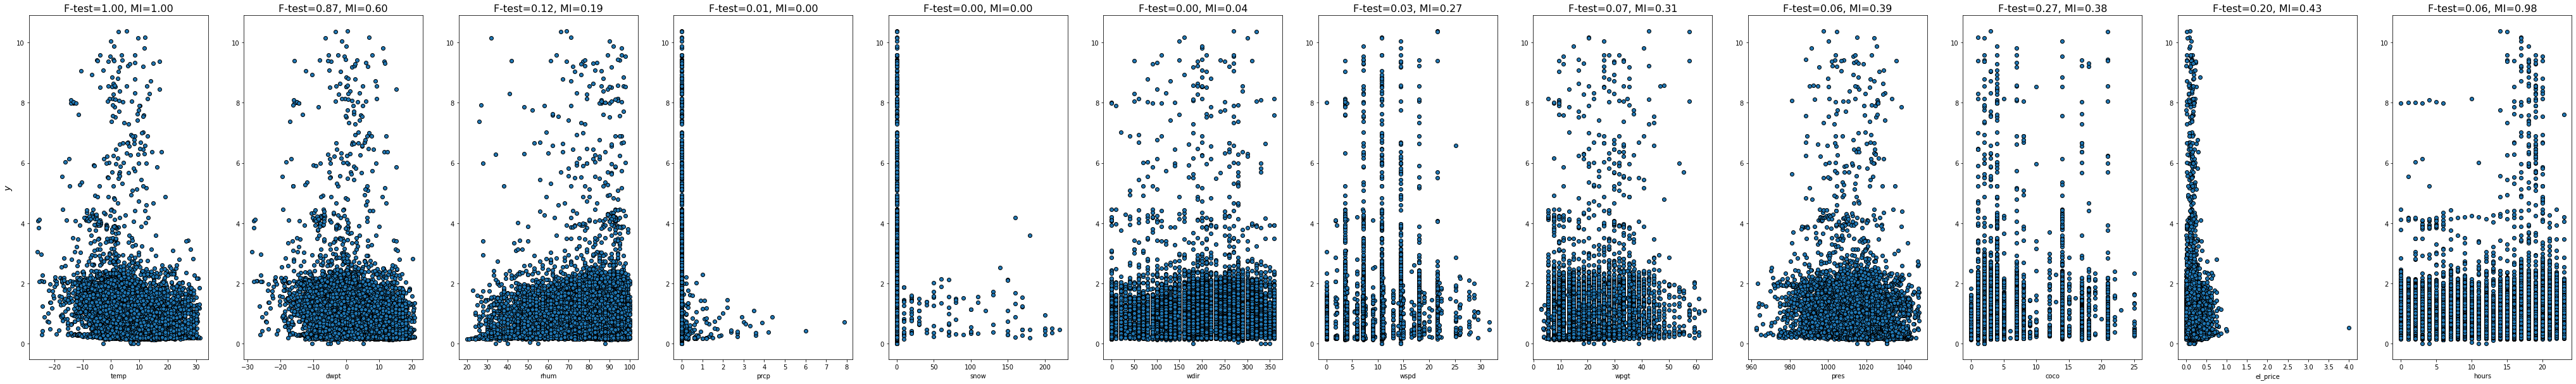

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression


f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(72, 10))
for i in range(12):
    plt.subplot(1, 12, i + 1)
    plt.scatter(X.iloc[:, i], y, edgecolor="black")
    plt.xlabel(X.columns[i]) #("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

In [ ]:
#### use less attributes

In [ ]:
X_less1 =X[["hours","temp","dwpt","coco","el_price"]]
y_less1 = y[["consumption"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_less1, y_less1, test_size = 0.02, random_state = 42, shuffle=False)
LR_less1 = LinearRegression()
LR_less1.fit(x_train, y_train) 
y_pred_less1=LR_less1.predict(x_test)
mean_absolute_error(y_test,y_pred_less1)

0.5472388021938468

In [ ]:
#### use less attributes and data. only one week for training to predict next week

In [ ]:
w2['hours'] = w2.time.str[11:13]  #hours 1-24
w2['hours']=pd.to_numeric(w2['hours'])

In [ ]:
w1['hours'] = w1.time.str[11:13]  #hours 1-24
w1['hours']=pd.to_numeric(w1['hours'])

In [ ]:
X_w2_less=w2[["hours","temp","dwpt","coco","el_price"]]
y_w2_less = w2[["y"]]

In [ ]:
LR_w2_less = LinearRegression()
LR_w2_less.fit(X_w2_less, y_w2_less) 
y_pred_w2_less=LR_w2_less.predict(w1[["hours","temp","dwpt","coco","el_price"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less)

0.3843217271560652

In [ ]:
X_w2_less=w2[["hours","temp","dwpt","el_price"]]
y_w2_less = w2[["y"]]
LR_w2_less = LinearRegression()
LR_w2_less.fit(X_w2_less, y_w2_less) 
y_pred_w2_less=LR_w2_less.predict(w1[["hours","temp","dwpt","el_price"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less)

0.37529271137253206

In [ ]:
X_w2_less=w2[["hours","temp","dwpt"]]
y_w2_less = w2[["y"]]
LR_w2_less = LinearRegression()
LR_w2_less.fit(X_w2_less, y_w2_less) 
y_pred_w2_less=LR_w2_less.predict(w1[["hours","temp","dwpt"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less)

0.37439207277321646

In [ ]:
X_w2_less=w2[["hours","temp"]]  ## try in kaggle (second)
y_w2_less = w2[["y"]]
LR_w2_less = LinearRegression()
LR_w2_less.fit(X_w2_less, y_w2_less) 
y_pred_w2_less=LR_w2_less.predict(w1[["hours","temp"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less), mean_squared_error(w1[["y"]],y_pred_w2_less)

(0.3680982632551843, 0.22253325719303027)

In [ ]:
X_w2_less=w2[["hours","temp","wdir"]]
y_w2_less = w2[["y"]]
LR_w2_less = LinearRegression()
LR_w2_less.fit(X_w2_less, y_w2_less) 
y_pred_w2_less=LR_w2_less.predict(w1[["hours","temp","wdir"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less), mean_squared_error(w1[["y"]],y_pred_w2_less)

(0.37036537949581333, 0.2229432358123716)

In [ ]:
X_w2_less=w2[["temp","wdir","hours"]]
y_w2_less = w2[["y"]]
LR_w2_less = LinearRegression()
LR_w2_less.fit(X_w2_less, y_w2_less) 
y_pred_w2_less=LR_w2_less.predict(w1[["temp","wdir","hours"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less)

0.3703653794958133

In [ ]:
X = generate_cyclical_features(X, 'hours', 24, 0) 


In [ ]:

X_w2_less_c=w2[["hours","temp"]]
y_w2_less = w2[["y"]]

X_w2_less_c = generate_cyclical_features(X_w2_less_c, 'hours', 24, 0) 
w1_c = generate_cyclical_features(w1, 'hours', 24, 0) 

LR_w2_less_c = LinearRegression()
LR_w2_less_c.fit(X_w2_less_c, y_w2_less) 
y_pred_w2_less_c=LR_w2_less_c.predict(w1_c[["temp","sin_hours","cos_hours"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less_c)

0.3741370409902366

In [ ]:
#X_season1 =X_season[["temp","wdir","sin_hours","cos_hours"]]
#X_w1_season1 =X_w1_season[["temp","wdir","sin_hours","cos_hours"]]


In [ ]:
X_w2_less_c1=w2[["hours","temp", "wdir"]]
y_w2_less = w2[["y"]]

X_w2_less_c1 = generate_cyclical_features(X_w2_less_c1, 'hours', 24, 0) 
w1_c1 = generate_cyclical_features(w1, 'hours', 24, 0) 

LR_w2_less_c1 = LinearRegression()
LR_w2_less_c1.fit(X_w2_less_c1, y_w2_less) 
y_pred_w2_less_c1=LR_w2_less_c1.predict(w1_c1[["temp","wdir","sin_hours","cos_hours"]])
mean_absolute_error(w1[["y"]],y_pred_w2_less_c1)

0.3773328547216871

In [ ]:

X_w1 =w1[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]] 
X_train_w2=w2[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y_train_w2 = w2["y"]

X_train_w2['hours'] = w2.time.str[11:13]
X_train_w2['hours']=pd.to_numeric(X_train_w2['hours'])
X_w1['hours'] = w1.time.str[11:13]
X_w1['hours']=pd.to_numeric(X_w1['hours'])
X_train_w2_season = generate_cyclical_features(X_train_w2, 'hours', 24, 0)
X_w1_season = generate_cyclical_features(X_w1, 'hours', 24, 0)


X_train_w2_season_season1 =X_train_w2_season[["temp","wdir","sin_hours","cos_hours"]]
X_w1_season1 =X_w1_season[["temp","wdir","sin_hours","cos_hours"]]

LR_w2 = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR_w2.fit(X_train_w2_season_season1, y_train_w2)
y_pred_w2=LR_w2.predict(X_w1_season1)


mean_squared_error(X_w1[["y"]], y_pred_w2), mean_absolute_error(X_w1[["y"]], y_pred_w2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

(0.2286391631622174, 0.3773328547216871)

In [ ]:
#################################### 2 weeks of training data

In [ ]:
w_3_2=w_3_2.fillna(0)
w_3_2=w_3_2.round(10)

In [ ]:


X_w1 =w1[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]] 
y_w1=w1["y"]
X_train_w3_2=w_3_2[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y_train_w_3_2 = w_3_2["y"]



X_train_w3_2['hours'] = w_3_2.time.str[11:13]
X_train_w3_2['hours']=pd.to_numeric(X_train_w3_2['hours'])
X_w1['hours'] = w1.time.str[11:13]
X_w1['hours']=pd.to_numeric(X_w1['hours'])
X_train_w3_2 = generate_cyclical_features(X_train_w3_2, 'hours', 24, 0)
X_w1 = generate_cyclical_features(X_w1, 'hours', 24, 0)


X_train_w3_2 =X_train_w3_2[["temp","wdir","sin_hours","cos_hours"]]
X_w1 =X_w1[["temp","wdir","sin_hours","cos_hours"]]

LR_w3_2 = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR_w3_2.fit(X_train_w3_2, y_train_w_3_2)
y_pred_w_3_2=LR_w3_2.predict(X_w1)


mean_squared_error(y_w1, y_pred_w_3_2), mean_absolute_error(y_w1, y_pred_w_3_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

(0.2234120435513607, 0.37141759151860576)

In [ ]:
#time hours 0-23

X_w1 =w1[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]] 
y_w1=w1["y"]
X_train_w3_2=w_3_2[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y_train_w_3_2 = w_3_2["y"]



X_train_w3_2['hours'] = w_3_2.time.str[11:13]
X_train_w3_2['hours']=pd.to_numeric(X_train_w3_2['hours'])
X_w1['hours'] = w1.time.str[11:13]
X_w1['hours']=pd.to_numeric(X_w1['hours'])


X_train_w3_2 =X_train_w3_2[["temp","wdir","hours"]]
X_w1 =X_w1[["temp","wdir","hours"]]

LR_w3_2 = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR_w3_2.fit(X_train_w3_2, y_train_w_3_2)
y_pred_w_3_2=LR_w3_2.predict(X_w1)


mean_squared_error(y_w1, y_pred_w_3_2), mean_absolute_error(y_w1, y_pred_w_3_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

(0.22093052551445103, 0.3650813734493618)

In [ ]:
##kaggle  Score: 0.35203 

#time hours 0-23

X_w0 =w0[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]] 

X_train_w3_2=w_3_2[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y_train_w_3_2 = w_3_2["y"]



X_train_w3_2['hours'] = w_3_2.time.str[11:13]
X_train_w3_2['hours']=pd.to_numeric(X_train_w3_2['hours'])
X_w0['hours'] = w0.time.str[11:13]
X_w0['hours']=pd.to_numeric(X_w0['hours'])


X_train_w3_2 =X_train_w3_2[["temp","wdir","hours"]]
X_w0 =X_w0[["temp","wdir","hours"]]

LR_w3_2 = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR_w3_2.fit(X_train_w3_2, y_train_w_3_2)
y_pred_w_3_2=LR_w3_2.predict(X_w0)


submission = pd.DataFrame(
    {'time': w0.time, 'consumption': y_pred_w_3_2},
    columns = ['time', 'consumption'])
submission.to_csv('submission_LR_w_2_3_v2.csv', index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
#time hours 0-23

X_w1 =w1[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]] 
y_w1=w1["y"]
X_train_weeks4=weeks_4[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]
y_train_weeks4 = weeks_4["consumption"]



X_train_weeks4['hours'] = weeks_4.time.str[11:13]
X_train_weeks4['hours']=pd.to_numeric(X_train_weeks4['hours'])
X_w1['hours'] = w1.time.str[11:13]
X_w1['hours']=pd.to_numeric(X_w1['hours'])


X_train_weeks4 =X_train_weeks4[["temp","wdir","hours"]]
X_w1 =X_w1[["temp","wdir","hours"]]

LR_weeks_4 = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR_weeks_4.fit(X_train_weeks4, y_train_weeks4)
y_pred_weeks_4=LR_weeks_4.predict(X_w1)


mean_squared_error(y_w1, y_pred_weeks_4), mean_absolute_error(y_w1, y_pred_weeks_4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

(0.22685518389781043, 0.39500982788930844)

In [ ]:
#####################################################################

In [ ]:
#try with prophet library when using different set of data.
#tried to use team member Ivan notebook. 
#Looks like prophet only takes in time and consumption and no other attributes. Tried changing train period to 28 days. Might improve performance